In [41]:
from scipy import stats  
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

SEED = 13

## Dealing with Categorical variables

In [3]:
automobile_data = pd.read_csv('Automobile_data.csv')

In [4]:
print('Data shape : rows: %s, cols : %s'% automobile_data.shape)

Data shape : rows: 205, cols : 26


In [5]:
automobile_data.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
23,1,118,dodge,gas,turbo,two,hatchback,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,7957
148,0,85,subaru,gas,std,four,wagon,4wd,front,96.9,...,108,2bbl,3.62,2.64,9.0,82,4800,23,29,8013
43,0,?,isuzu,gas,std,four,sedan,rwd,front,94.3,...,111,2bbl,3.31,3.23,8.5,78,4800,24,29,6785
31,2,137,honda,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.2,76,6000,31,38,6855
24,1,148,dodge,gas,std,four,hatchback,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6229


In [6]:
automobile_data['fuel-type'].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

In [7]:
fuel_type_encoded_data = pd.get_dummies(automobile_data['fuel-type'],prefix='fuel_type')
fuel_type_encoded_data.head()

,fuel_type_diesel,fuel_type_gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


## Outlier Analysis

In [8]:
heart_data = pd.read_csv('Heart_Data.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
cholestrol = heart_data['chol']

In [10]:
data_mean = cholestrol.mean()
data_std = cholestrol.std()
print('Cholestrol Mean Value : %.2f' % data_mean)
print('Cholestrol Std Dev: %.2f' % data_std)

Cholestrol Mean Value : 246.26
Cholestrol Std Dev: 51.83


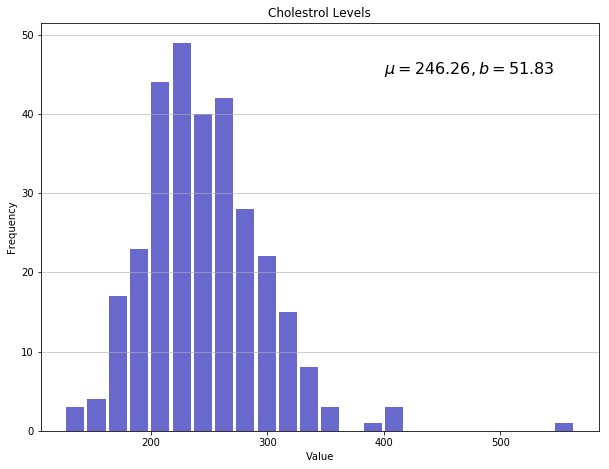

In [11]:
plt.figure(figsize=(10,7.5))
n, bins, patches = plt.hist(x=cholestrol, bins='auto', color='#0504aa',alpha=0.6, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Cholestrol Levels')
plt.text(400, 45,r'$\mu=%.2f, b=%.2f$'%(data_mean,data_std),fontsize=16)
plt.show()

In [12]:
print('left outlier threshold : %.2f'%(data_mean - 3*data_std))
print('right outlier threshold : %.2f'%(data_mean + 3*data_std))

left outlier threshold : 90.77
right outlier threshold : 401.76


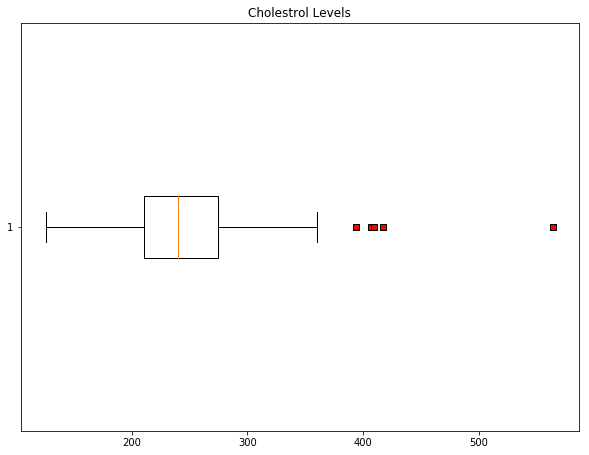

In [13]:
plt.figure(figsize=(10,7.5))
red_square = dict(markerfacecolor='r', marker='s')
plt.boxplot(cholestrol, notch=False, vert=False, flierprops=red_square)
plt.title('Cholestrol Levels')
plt.show()

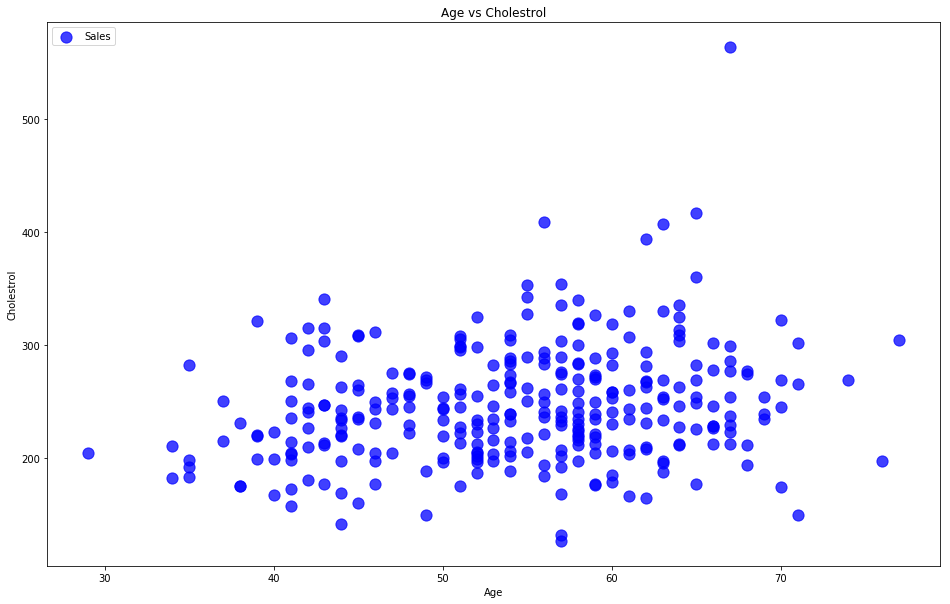

In [14]:
plt.figure(figsize=(16,10))

x = heart_data['age'].values
y = cholestrol.values

plt.scatter(x, y, s= 500, c="b", alpha=0.75, marker='.',label='Sales')

plt.xlabel("Age")
plt.ylabel("Cholestrol")
plt.title('Age vs Cholestrol')
plt.legend(loc='upper left')
plt.show()

## Missing values

In [15]:
titanic_data = pd.read_csv('Titanic_Data.csv')
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [16]:
missing_val_count_by_column = (titanic_data.isnull().sum())
missing_val_count_by_column[missing_val_count_by_column > 0].sort_values(ascending=False)

body         1189
cabin        1015
boat          824
home.dest     565
age           264
embarked        3
fare            2
ticket          1
parch           1
sibsp           1
sex             1
name            1
survived        1
pclass          1
dtype: int64

In [17]:
titanic_data.shape

(1310, 14)

In [18]:
mean_age = titanic_data.age.mean()
titanic_data.age = titanic_data.age.fillna(mean_age)
print('N/A values filled in with mean value : %.2f'% mean_age)

N/A values filled in with mean value : 29.88


In [19]:
missing_val_count_by_column = (titanic_data.isnull().sum())
missing_val_count_by_column[missing_val_count_by_column > 0].sort_values(ascending=False)

body         1189
cabin        1015
boat          824
home.dest     565
embarked        3
fare            2
ticket          1
parch           1
sibsp           1
sex             1
name            1
survived        1
pclass          1
dtype: int64

## All variables correlation

In [20]:
heart_numeric_data = heart_data[['age','trestbps','chol','thalach','oldpeak']].copy()
heart_numeric_data.sample(5)

,age,trestbps,chol,thalach,oldpeak
42,45,104,208,148,3.0
254,59,160,273,125,0.0
213,61,145,307,146,1.0
52,62,130,231,146,1.8
301,57,130,131,115,1.2


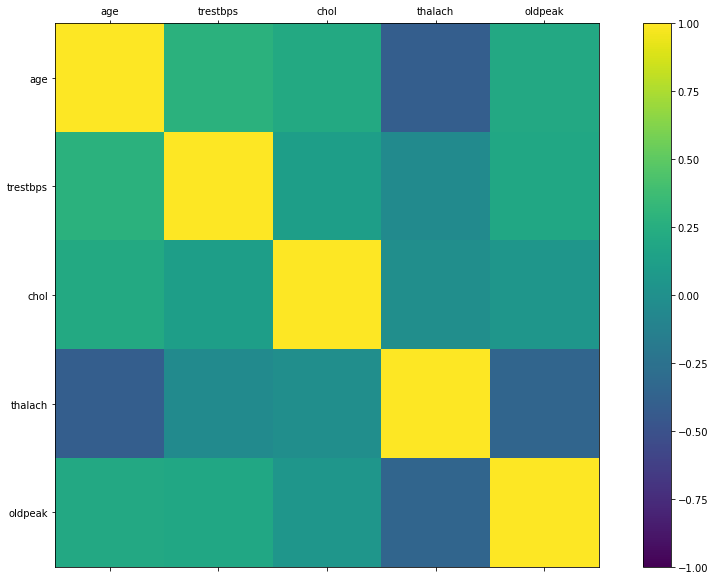

In [21]:
correlations = heart_numeric_data.corr()
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,5,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(heart_numeric_data.columns)
ax.set_yticklabels(heart_numeric_data.columns)
plt.show()

## Variance

In [22]:
heart_numeric_data.var()

age           82.484558
trestbps     307.586453
chol        2686.426748
thalach      524.646406
oldpeak        1.348095
dtype: float64

In [23]:
heart_numeric_data['body_temp'] = 95

In [24]:
heart_numeric_data.var()

age            82.484558
trestbps      307.586453
chol         2686.426748
thalach       524.646406
oldpeak         1.348095
body_temp       0.000000
dtype: float64

In [25]:
heart_numeric_data = heart_numeric_data.drop(['body_temp'],axis=1)

## Scaling

In [26]:
scaler = MinMaxScaler()
scaler.fit(heart_numeric_data)
scaled_matrix = scaler.transform(heart_numeric_data)

In [27]:
pd.DataFrame(scaled_matrix).describe()

,0,1,2,3,4
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.528465,0.354941,0.274575,0.600358,0.167678
std,0.189210,0.165454,0.118335,0.174849,0.187270
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385417,0.245283,0.194064,0.477099,0.000000
50%,0.541667,0.339623,0.260274,0.625954,0.129032
75%,0.666667,0.433962,0.339041,0.725191,0.258065
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
scaler = StandardScaler()
scaler.fit(heart_numeric_data)
scaled_matrix = scaler.transform(heart_numeric_data)

In [29]:
pd.DataFrame(scaled_matrix).describe()

,0,1,2,3,4
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,5.825923e-17,-7.146832e-16,-9.828955e-17,-5.203025e-16,-3.140136e-16
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-2.148802e+00,-2.324160e+00,-3.439267e+00,-8.968617e-01
25%,-7.572802e-01,-6.638668e-01,-6.814943e-01,-7.061105e-01,-8.968617e-01
50%,6.988599e-02,-9.273778e-02,-1.210553e-01,1.466343e-01,-2.067053e-01
75%,7.316189e-01,4.783913e-01,5.456738e-01,7.151309e-01,4.834512e-01
max,2.496240e+00,3.905165e+00,6.140401e+00,2.289429e+00,4.451851e+00


## Log Transform

In [34]:
cancer_data =  pd.read_csv('Cancer_Data.csv',index_col=0)
cancer_data.shape

(569, 32)

In [35]:
cancer_data.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
8810158,B,13.11,22.54,87.02,529.4,0.10020,0.14830,0.08705,0.05102,0.1850,...,29.16,99.48,639.3,0.1349,0.4402,0.3162,0.11260,0.4128,0.10760,NaN
8910748,B,11.29,13.04,72.23,388.0,0.09834,0.07608,0.03265,0.02755,0.1769,...,16.18,78.27,457.5,0.1358,0.1507,0.1275,0.08750,0.2733,0.08022,NaN
904971,B,10.94,18.59,70.39,370.0,0.10040,0.07460,0.04944,0.02932,0.1486,...,25.58,82.76,472.4,0.1363,0.1644,0.1412,0.07887,0.2251,0.07732,NaN
911391,B,10.88,15.62,70.41,358.9,0.10070,0.10690,0.05115,0.01571,0.1861,...,19.35,80.78,433.1,0.1332,0.3898,0.3365,0.07966,0.2581,0.10800,NaN
88649001,M,19.55,28.77,133.60,1207.0,0.09260,0.20630,0.17840,0.11440,0.1893,...,36.27,178.60,1926.0,0.1281,0.5329,0.4251,0.19410,0.2818,0.10050,NaN


In [51]:
cancer_data_skew = cancer_data[['area_mean','compactness_mean']].copy()
cancer_data_skew.sample(5)

,area_mean,compactness_mean
id,,
8910748,388.0,0.07608
921644,668.6,0.07214
875878,516.4,0.05366
858970,311.9,0.08061
886452,602.4,0.12790


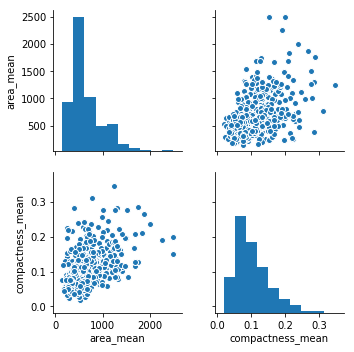

In [52]:
sns.pairplot(cancer_data_skew)

In [57]:
cancer_data_log = np.log1p(cancer_data_skew)

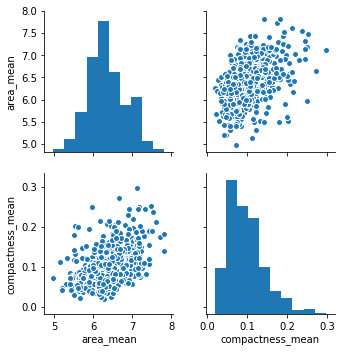

In [58]:
sns.pairplot(cancer_data_log)

In [59]:
scaler = StandardScaler()
scaler.fit(cancer_data_log)
scaled_matrix = scaler.transform(cancer_data_log)
cancer_data_scaled_log = pd.DataFrame(scaled_matrix,columns=cancer_data_log.columns,index=cancer_data_log.index)

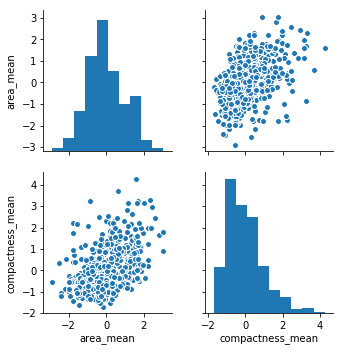

In [60]:
sns.pairplot(cancer_data_scaled_log)